In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
import warnings
warnings.filterwarnings('ignore')

# Data Fetching and Preprocessing

In [3]:
data = pd.read_csv('spotify_features.csv')

In [5]:
data.dropna(inplace = True)

In [6]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [7]:
data['Day'] = data['Date'].apply(lambda x: int(x.split('-')[2]))
data['Month'] = data['Date'].apply(lambda x: int(x.split('-')[1]))
data['Year'] = data['Date'].apply(lambda x: int(x.split('-')[0]))

In [8]:
data_region = data.copy()

In [9]:
data_region.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region',
       'TrackID', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'Day', 'Month', 'Year'],
      dtype='object')

In [10]:
data_region = data_region[data_region['Streams'] > 0.0]
data_region

,Position,Track Name,Artist,Streams,URL,Date,Region,TrackID,danceability,energy,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Day,Month,Year
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,...,audio_features,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560,4,1,1,2017
1,1,Reggaetón Lento (Bailemos),CNCO,16672,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-02,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,...,audio_features,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560,4,2,1,2017
2,1,Reggaetón Lento (Bailemos),CNCO,17258,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-03,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,...,audio_features,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560,4,3,1,2017
3,1,Reggaetón Lento (Bailemos),CNCO,18146,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-04,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,...,audio_features,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560,4,4,1,2017
4,1,Reggaetón Lento (Bailemos),CNCO,17788,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-05,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,...,audio_features,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560,4,5,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440516,115,缺,Hins Cheung,3208,https://open.spotify.com/track/27RQbXMyZMqOjFv...,2018-01-09,hk,27RQbXMyZMqOjFvSg5slg4,0.566,0.428,...,audio_features,27RQbXMyZMqOjFvSg5slg4,spotify:track:27RQbXMyZMqOjFvSg5slg4,https://api.spotify.com/v1/tracks/27RQbXMyZMqO...,https://api.spotify.com/v1/audio-analysis/27RQ...,280714,3,9,1,2018
3440517,111,有火,Nicholas Tse,3246,https://open.spotify.com/track/484RuK3NdSwb8y6...,2018-01-05,hk,484RuK3NdSwb8y6Z2cFpq4,0.382,0.713,...,audio_features,484RuK3NdSwb8y6Z2cFpq4,spotify:track:484RuK3NdSwb8y6Z2cFpq4,https://api.spotify.com/v1/tracks/484RuK3NdSwb...,https://api.spotify.com/v1/audio-analysis/484R...,237036,4,5,1,2018
3440518,153,有火,Nicholas Tse,2530,https://open.spotify.com/track/484RuK3NdSwb8y6...,2018-01-06,hk,484RuK3NdSwb8y6Z2cFpq4,0.382,0.713,...,audio_features,484RuK3NdSwb8y6Z2cFpq4,spotify:track:484RuK3NdSwb8y6Z2cFpq4,https://api.spotify.com/v1/tracks/484RuK3NdSwb...,https://api.spotify.com/v1/audio-analysis/484R...,237036,4,6,1,2018
3440519,197,繼續追,帶菌者,2178,https://open.spotify.com/track/2yJXJzjCUHdGmWm...,2018-01-05,hk,2yJXJzjCUHdGmWmlMNq0lt,0.515,0.532,...,audio_features,2yJXJzjCUHdGmWmlMNq0lt,spotify:track:2yJXJzjCUHdGmWmlMNq0lt,https://api.spotify.com/v1/tracks/2yJXJzjCUHdG...,https://api.spotify.com/v1/audio-analysis/2yJX...,235116,4,5,1,2018


In [11]:
data_copy = data_region.copy()

In [12]:
data_region.drop(['Date','URL','type','id','uri','track_href','analysis_url','time_signature'],axis = 1,inplace = True)

In [14]:
data_region

,Position,Track Name,Artist,Streams,Region,TrackID,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Day,Month,Year
0,1,Reggaetón Lento (Bailemos),CNCO,19272,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,4,-3.073,...,0.0502,0.400,0.000000,0.176,0.710,93.974,222560,1,1,2017
1,1,Reggaetón Lento (Bailemos),CNCO,16672,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,4,-3.073,...,0.0502,0.400,0.000000,0.176,0.710,93.974,222560,2,1,2017
2,1,Reggaetón Lento (Bailemos),CNCO,17258,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,4,-3.073,...,0.0502,0.400,0.000000,0.176,0.710,93.974,222560,3,1,2017
3,1,Reggaetón Lento (Bailemos),CNCO,18146,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,4,-3.073,...,0.0502,0.400,0.000000,0.176,0.710,93.974,222560,4,1,2017
4,1,Reggaetón Lento (Bailemos),CNCO,17788,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,4,-3.073,...,0.0502,0.400,0.000000,0.176,0.710,93.974,222560,5,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440516,115,缺,Hins Cheung,3208,hk,27RQbXMyZMqOjFvSg5slg4,0.566,0.428,10,-10.010,...,0.0347,0.642,0.000000,0.102,0.253,120.015,280714,9,1,2018
3440517,111,有火,Nicholas Tse,3246,hk,484RuK3NdSwb8y6Z2cFpq4,0.382,0.713,7,-5.470,...,0.0306,0.302,0.000000,0.118,0.377,172.166,237036,5,1,2018
3440518,153,有火,Nicholas Tse,2530,hk,484RuK3NdSwb8y6Z2cFpq4,0.382,0.713,7,-5.470,...,0.0306,0.302,0.000000,0.118,0.377,172.166,237036,6,1,2018
3440519,197,繼續追,帶菌者,2178,hk,2yJXJzjCUHdGmWmlMNq0lt,0.515,0.532,0,-6.908,...,0.0292,0.225,0.000000,0.330,0.285,171.860,235116,5,1,2018


In [15]:
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# print(classification_report(y_true=y_test,y_pred=y_pred,target_names=class_labels))
artists = data_region['Artist'].unique()
type(artists)


track_names = data_region['Track Name'].unique()
track_names.shape

artists_encoded = {}
encode = 0
for artist in artists:
    artists_encoded[artist] = encode
    encode += 1

artists_encoded

data_region['Artist_encoded'] = data_region['Artist'].apply(lambda x: artists_encoded[x])

track_encoded = {}
encode = 0
for track in track_names:
    track_encoded[track] = encode
    encode += 1

track_encoded

data_region['Track_Name_encode'] = data_region['Track Name'].apply(lambda x: track_encoded[x])

In [16]:
region_names = data_region['Region'].unique()
region_encode={}
encode =0
for region in region_names:
    region_encode[region] = encode
    encode+=1
    
data_region['Region_encoded'] = data_region['Region'].apply(lambda x: region_encode[x])

In [17]:
data_region.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'Region', 'TrackID',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'Day', 'Month', 'Year', 'Artist_encoded',
       'Track_Name_encode', 'Region_encoded'],
      dtype='object')

In [18]:
# 'tempo','loudness','key','danceability','energy'
# 'Day','Month'
#'Artist_encoded','Track_Name_encode'
#'Day','Month'
#'TrackName_encoded','Artist_encoded','Streams','Region_encoded','tempo','valence','loudness','key','danceability'
x = data_region[['Position','Artist_encoded','Track_Name_encode','Day','Month','Streams','tempo','loudness','key','danceability','valence','duration_ms']].to_numpy()
y = data_region['Region_encoded'].to_numpy()

# Model Predictions and Accuracies

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [201]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="constant",constant = 'us')
dummy_clf.fit(x, y)
dummy_clf.predict(x)
dummy_clf.score(x, y)

0.021561850661571316

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
depth = [10,20,30,40,50]
# depth = [20]
acc_test = []
acc_train = []

loss_test = []
loss_train = []

for i in depth:
    dt = DecisionTreeClassifier(random_state=42, max_depth=i)
    dt.fit(X_train, y_train)
    dt_predict_train = dt.predict(X_train)
    dt_predict_test = dt.predict(X_test)
    # dt_Accuracy = score(y_test, dt_predict)
    dt_Accuracy_train = dt.score(X_train,y_train)
    dt_Accuracy_test = dt.score(X_test,y_test)

    #     print("Accuracy: " + str(dt_Accuracy))

    # print(dt.predict_log_proba(X_test))

    acc_train.append(dt_Accuracy_train)
    acc_test.append(dt_Accuracy_test)
    
#     print(dt.predict_proba(X_train))
#     print(classification_report(y_true=y_test,y_pred=dt_predict_test))
    loss_train.append(log_loss(y_train,dt.predict_proba(X_train)))
    loss_test.append(log_loss(y_test,dt.predict_proba(X_test)))


In [101]:
acc_test

[0.361940216083364,
 0.6570801424434185,
 0.7540909466116208,
 0.7582961200096264,
 0.7585309679572065]

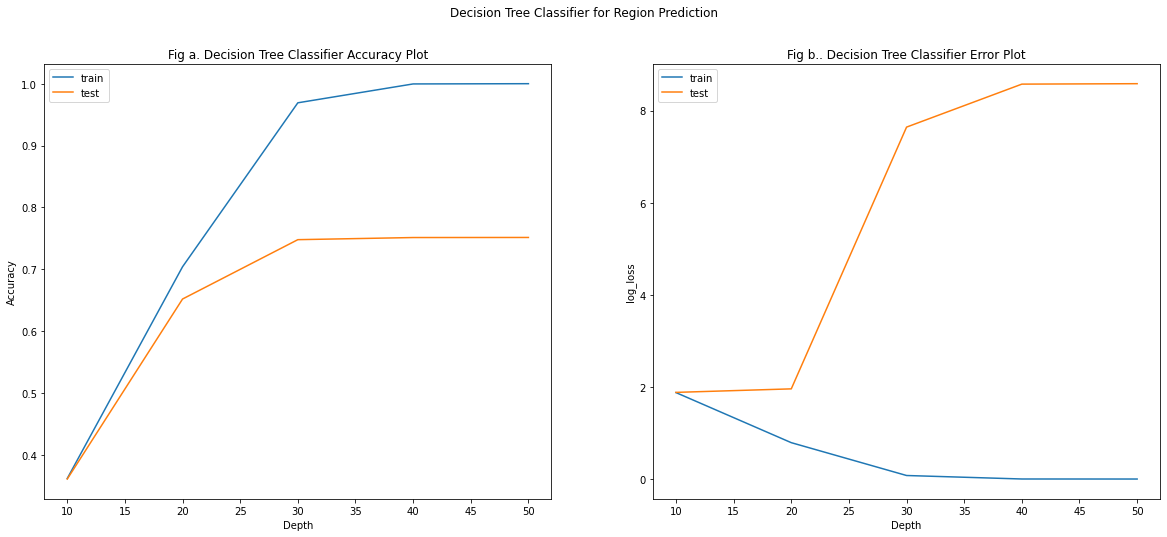

In [97]:
fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[0].plot(depth,acc_train,label = 'train')
ax[0].plot(depth,acc_test,label = 'test')
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Fig a. Decision Tree Classifier Accuracy Plot')
ax[0].legend()


ax[1].plot(depth,loss_train,label = 'train')
ax[1].plot(depth,loss_test,label = 'test')
ax[1].set_xlabel('Depth')
ax[1].set_ylabel('log_loss')
ax[1].set_title('Fig b.. Decision Tree Classifier Error Plot')
ax[1].legend()
fig.suptitle('Decision Tree Classifier for Region Prediction')
fig.savefig('Region.pdf')
plt.show()


In [37]:
#cross validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=3,shuffle = True,random_state = 42)
kf.get_n_splits(x)

3

In [50]:
#decision tree model with 3-fold cross validation
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dt = tree.DecisionTreeClassifier(random_state=0, max_depth=20)
    dt.fit(X_train, y_train)
    dt_predict = dt.predict(X_test)
    dt_Accuracy = accuracy_score(y_test, dt_predict)
    precision, recall, f1, n = precision_recall_fscore_support(y_test, dt_predict, average='weighted')
    y_pred_proba = dt.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba,multi_class = 'ovr')
    accuracies.append(dt_Accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)
#     print(precision,recall,f1)
#     print("Accuracy: " + str(dt_Accuracy))
    

TRAIN: [      3       4       6 ... 3440512 3440513 3440519] TEST: [      0       1       2 ... 3440517 3440518 3440520]
TRAIN: [      0       1       2 ... 3440518 3440519 3440520] TEST: [      3       6      14 ... 3440508 3440510 3440513]
TRAIN: [      0       1       2 ... 3440517 3440518 3440520] TEST: [      4       8      10 ... 3440509 3440512 3440519]


In [60]:
#knn model with 3-fold cross validation
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    KNN_Predict = clf.predict(X_test)
    KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
    precision, recall, f1, n = precision_recall_fscore_support(y_test, KNN_Predict, average='weighted')
    y_pred_proba = clf.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba,multi_class = 'ovr')
    accuracies.append(KNN_Accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)
#     print(precision,recall,f1)
#     print("Accuracy: " + str(dt_Accuracy))
    

TRAIN: [      3       4       6 ... 3440512 3440513 3440519] TEST: [      0       1       2 ... 3440517 3440518 3440520]
TRAIN: [      0       1       2 ... 3440518 3440519 3440520] TEST: [      3       6      14 ... 3440508 3440510 3440513]
TRAIN: [      0       1       2 ... 3440517 3440518 3440520] TEST: [      4       8      10 ... 3440509 3440512 3440519]


In [62]:
#Random forest model with 3-fold cross validation
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(random_state=0, max_depth=20)
    rf.fit(X_train, y_train)
    rf_predict = rf.predict(X_test)
    rf_Accuracy = accuracy_score(y_test, rf_predict)
    precision, recall, f1, n = precision_recall_fscore_support(y_test, rf_predict, average='weighted')
    y_pred_proba = rf.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba,multi_class = 'ovr')
    accuracies.append(rf_Accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)
    

TRAIN: [      3       4       6 ... 3440512 3440513 3440519] TEST: [      0       1       2 ... 3440517 3440518 3440520]
TRAIN: [      0       1       2 ... 3440518 3440519 3440520] TEST: [      3       6      14 ... 3440508 3440510 3440513]
TRAIN: [      0       1       2 ... 3440517 3440518 3440520] TEST: [      4       8      10 ... 3440509 3440512 3440519]


In [58]:
def average_results():
    accuracy = np.array(accuracies).mean()
    precision = np.array(precisions).mean()
    recall = np.array(recalls).mean()
    f1 = np.array(f1s).mean()
    auc = np.array(aucs).mean()
    return accuracy,precision,recall,f1,auc

In [61]:
#KNN Model
knn_accuracy,knn_precision,knn_recall,knn_f1,knn_auc = average_results()
print(knn_accuracy,knn_precision,knn_recall,knn_f1,knn_auc)

0.529282047641046 0.53573338999024 0.529282047641046 0.5293529349093583 0.8867979611840898


In [59]:
#Decision Tree Model
dt_accuracy,dt_precision,dt_recall,dt_f1,dt_auc = average_results()
print(dt_accuracy,dt_precision,dt_recall,dt_f1,dt_auc)

0.6524270593255849 0.6599573089836629 0.6524270593255849 0.6532202708613242 0.9715450834909424


In [63]:
#Random Forest Model
rf_accuracy,rf_precision,rf_recall,rf_f1,rf_auc = average_results()
print(rf_accuracy,rf_precision,rf_recall,rf_f1,rf_auc)

0.7450261163151913 0.7538852369079012 0.7450261163151913 0.744882718015158 0.9935520762507256


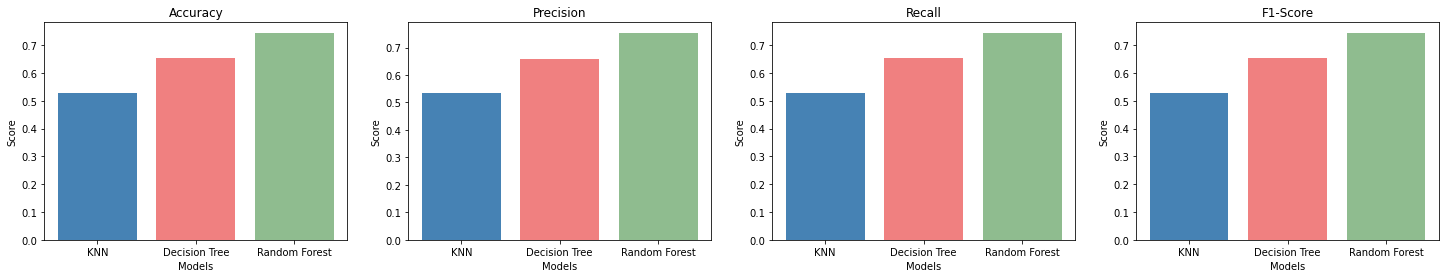

In [88]:
fig,ax = plt.subplots(1,4,figsize = (25,4))
labels = ['KNN','Decision Tree','Random Forest']
params = ['Accuracy','Precision','Recall','F1-Score']
precision = [knn_precision,dt_precision,rf_precision]
values = [[knn_accuracy,dt_accuracy,rf_accuracy],[knn_precision,dt_precision,rf_precision],[knn_recall,dt_recall,rf_recall],[knn_f1,dt_f1,rf_f1]]
for i in range(4):
    ax[i].bar(labels,values[i], color = ['steelblue', 'lightcoral','darkseagreen'])
    ax[i].set_title(params[i])
    ax[i].set_xlabel('Models')
    ax[i].set_ylabel('Score')


In [89]:
fig.suptitle('Region Prediction Scores')
fig.tight_layout()
fig.savefig('Region Predictions.pdf')